# **Feynman Diagrams Classification**

# Pendahuluan
Proyek ini dilatarbelakangi oleh tantangan yang dihadapi oleh sejumlah mahasiswa fisika dalam memahami dan menganalisis diagram Feynman, yang merupakan salah satu alat fundamental dalam fisika partikel. Diagram Feynman digunakan untuk merepresentasikan interaksi partikel subatomik dalam kerangka Model Standar, dan sering kali menjadi bagian penting dalam memahami proses fisika seperti interaksi elektromagnetik, lemah, dan kuat.

Dalam rangka mendukung pembelajaran dan penelitian di bidang fisika partikel, proyek ini bertujuan untuk mengembangkan model berbasis machine learning yang mampu mengklasifikasikan enam jenis diagram Feynman yang mencakup interaksi dasar dalam Model Standar. Model ini diharapkan membantu mahasiswa dalam mengenali dan memahami diagram Feynman dengan lebih efektif.

# Import Library

In [ ]:
%%capture
!pip install tf-keras tensorflow tensorflowjs

from google.colab import drive, files
from keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, pathlib, random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflowjs as tfjs

# Dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/My Drive/Colab Notebooks/Feynman Diagram/train'
val_dir = '/content/drive/My Drive/Colab Notebooks/Feynman Diagram/val'

# Augmentasi Data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   width_shift_range=.05,
                                   height_shift_range=.05,
                                   shear_range=.05,
                                   zoom_range=.05,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Generator Data

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=30, color_mode='grayscale', class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(val_dir, target_size=(128, 128), batch_size=30, color_mode='grayscale', class_mode='categorical')

Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [ ]:
print("Kelas yang terdeteksi:", train_generator.class_indices)

Kelas yang terdeteksi: {'Electromagnetic': 0, 'Higgs': 1, 'Strong': 2, 'Weak_W_Lepton': 3, 'Weak_W_Quark': 4, 'Weak_Z': 5}


In [ ]:
x_batch, y_batch = next(train_generator)
print("Ukuran batch data:", x_batch.shape)
print("Label batch data:", y_batch.shape)

Ukuran batch data: (30, 128, 128, 1)
Label batch data: (30, 6)


# Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(30, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(60, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(90, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 30)        │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 60)          │          16,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 90)          │          48,690 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 90)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 17640)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17640)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │       2,116,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             726 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,182,896 (8.33 MB)

 Trainable params: 2,182,896 (8.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class StopTrainingAtThreshold(tf.keras.callbacks.Callback):
    def __init__(self, accuracy_threshold=0.95):
        super(StopTrainingAtThreshold, self).__init__()
        self.accuracy_threshold = accuracy_threshold

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("accuracy")
        val_acc = logs.get("val_accuracy")
        if acc and val_acc:
            if acc > self.accuracy_threshold and val_acc > self.accuracy_threshold:
                print(f"\nTraining stopped at epoch {epoch + 1} as accuracy ({acc:.2f}) and val_accuracy ({val_acc:.2f}) both exceeded {self.accuracy_threshold}.")
                self.model.stop_training = True

threshold_callback = StopTrainingAtThreshold(accuracy_threshold=0.95)

In [ ]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=10, validation_data=validation_generator, validation_steps=2, callbacks=[threshold_callback], verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1781 - loss: 1.8267 - val_accuracy: 0.1500 - val_loss: 1.7875
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2057 - loss: 1.7903 - val_accuracy: 0.2000 - val_loss: 1.7751
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1984 - loss: 1.7744 - val_accuracy: 0.4000 - val_loss: 1.7056
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3287 - loss: 1.7098 - val_accuracy: 0.5500 - val_loss: 1.5032
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5218 - loss: 1.4081 - val_accuracy: 0.7500 - val_loss: 0.8661
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6658 - loss: 0.8981 - val_accuracy: 0.9000 - val_loss: 0.3854
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7406 - loss: 0.5547 - val_accuracy: 0.9000 - val_loss: 0.2223
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8890 - loss: 0.3251 - val_accuracy: 0.9833 - val_loss: 0.0717
Epoch 9/10
8/8 ━━━━━━━

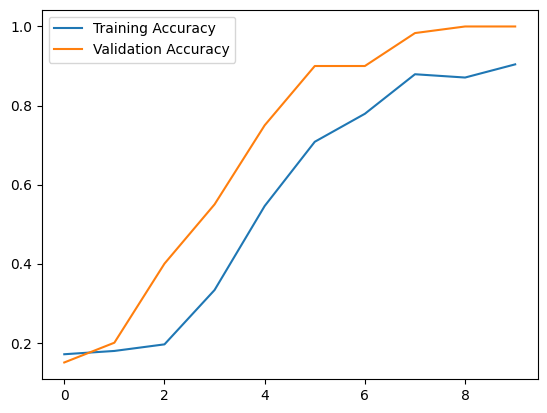

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

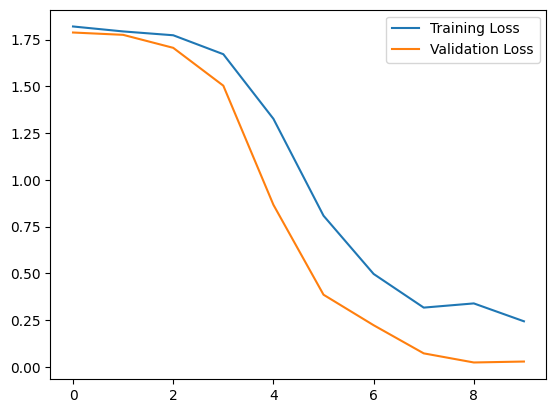

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='best')
plt.show()

# Prediksi

Saving Weak_Z_304.png to Weak_Z_304.png
Saving Weak_W_Quark_246.png to Weak_W_Quark_246.png
Saving Weak_W_Lepton_115.png to Weak_W_Lepton_115.png
Saving Strong_96.png to Strong_96.png
Saving Electromagnetic_28.png to Electromagnetic_28.png
Saving Higgs_67.png to Higgs_67.png
Saving Weak W Quarks.png to Weak W Quarks.png
Saving Strong.png to Strong.png
Saving Weak W Lepton.png to Weak W Lepton.png
Saving Weak Z.png to Weak Z.png
Saving Electromagnetic.png to Electromagnetic.png
Saving Higgs.png to Higgs.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


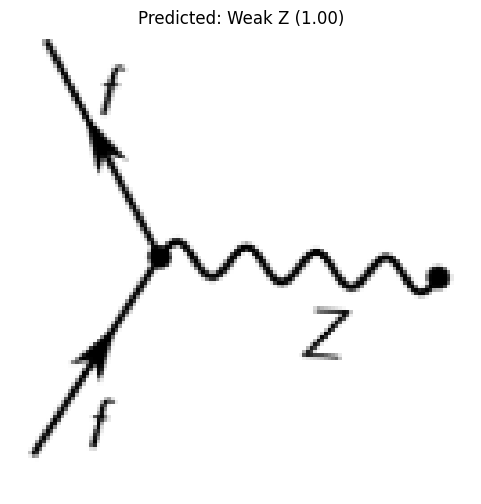

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


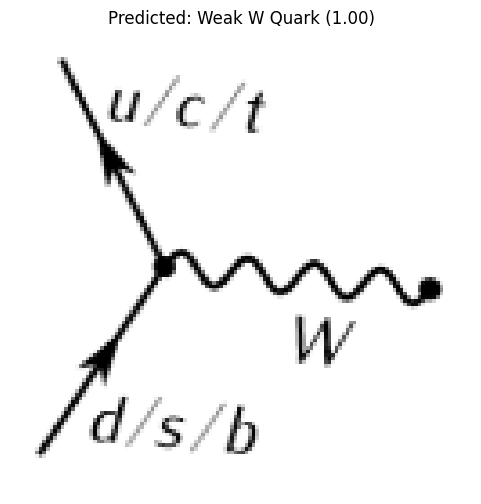

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


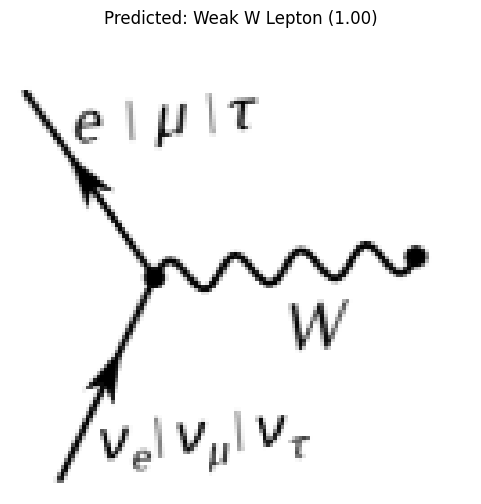

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


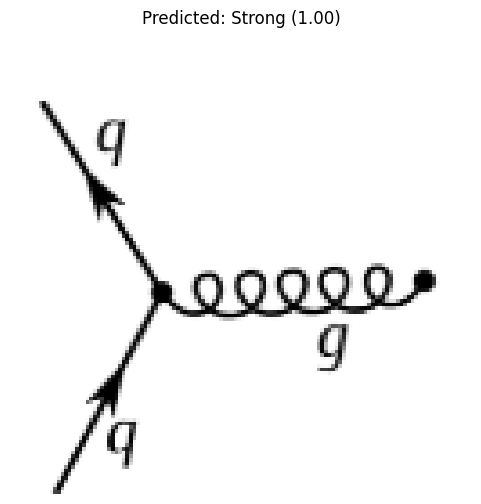

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


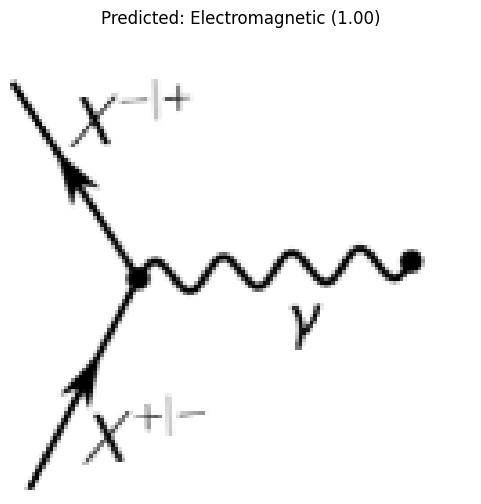

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


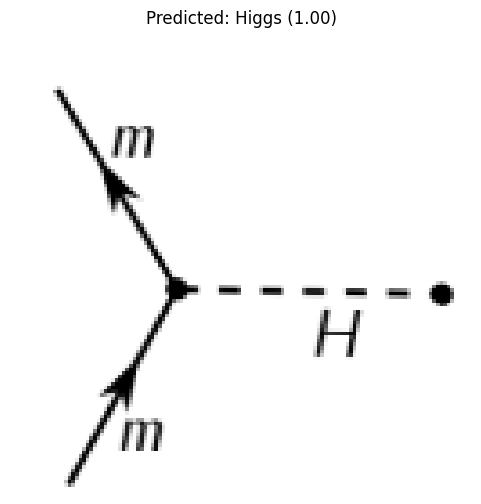

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


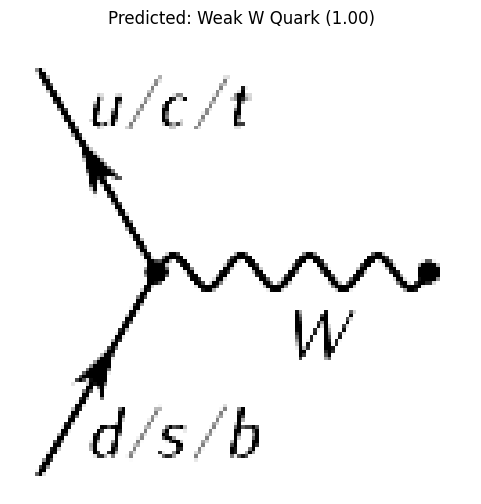

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


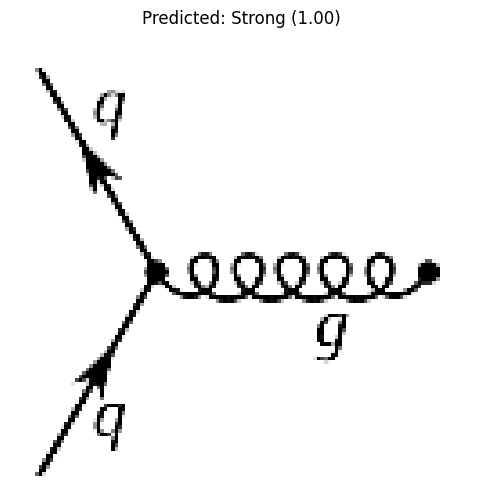

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


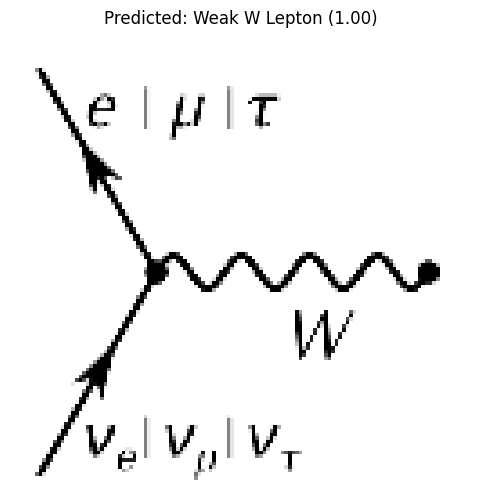

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


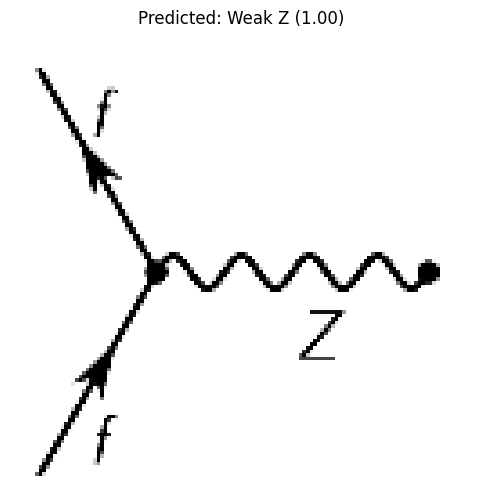

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


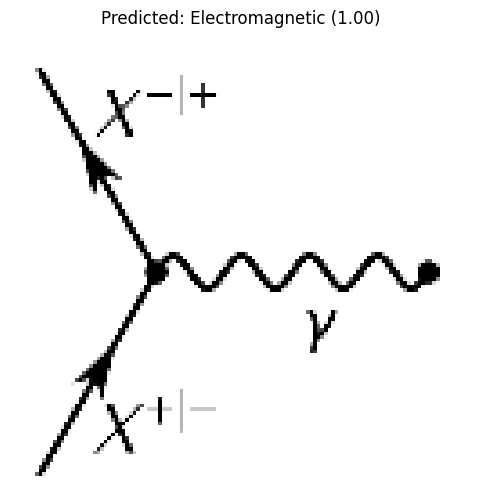

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


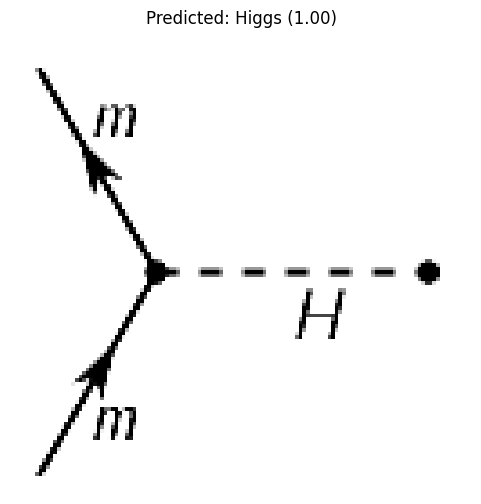

In [ ]:
uploaded = files.upload()
class_labels = ['Electromagnetic', 'Higgs', 'Strong', 'Weak W Lepton', 'Weak W Quark', 'Weak Z']

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(128, 128), color_mode='grayscale')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    predictions = model.predict(x)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({predictions[0][predicted_class_index]:.2f})")
    plt.show()

# Save Model

In [ ]:
tf.saved_model.save(model, "/content/drive/My Drive/Colab Notebooks/Feynman Diagram/saved_model")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/content/drive/My Drive/Colab Notebooks/Feynman Diagram/tflite/model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpn2hkh02v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  136436557484432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557486352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557485776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557486160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557485584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557486544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557486736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557487888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557488272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136436557489232: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Feynman Diagram/tflite/label.txt', 'w') as f:
    for label in class_labels:
        f.write(f"{label}\n")

In [ ]:
tfjs_target_dir = "/content/drive/My Drive/Colab Notebooks/Feynman Diagram/tfjs_model"
tfjs.converters.save_keras_model(model, tfjs_target_dir)

failed to lookup keras version from the file,
    this is likely a weight only file


# Inference Menggunakan TF-Lite

In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/My Drive/Colab Notebooks/Feynman Diagram/tflite/model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for i in range(12):
  random_element = random.choice(class_labels)
  img = Image.open(f"{random_element}.png").convert("L")
  img = img.resize((128, 128))
  img_array = np.expand_dims(np.array(img) / 255.0, axis=(0, -1))

  interpreter.set_tensor(input_details[0]['index'], img_array.astype(np.float32))
  interpreter.invoke()

  output_data = interpreter.get_tensor(output_details[0]['index'])
  predicted_class = np.argmax(output_data)
  print(f"Selected Class: {random_element}")
  print(f"Predicted Class: {class_labels[predicted_class]}")

Selected Class: Weak W Lepton
Predicted Class: Weak W Lepton
Selected Class: Strong
Predicted Class: Strong
Selected Class: Weak Z
Predicted Class: Weak Z
Selected Class: Weak W Quark
Predicted Class: Weak W Quark
Selected Class: Electromagnetic
Predicted Class: Electromagnetic
Selected Class: Weak W Quark
Predicted Class: Weak W Quark
Selected Class: Weak Z
Predicted Class: Weak Z
Selected Class: Strong
Predicted Class: Strong
Selected Class: Strong
Predicted Class: Strong
Selected Class: Electromagnetic
Predicted Class: Electromagnetic
Selected Class: Electromagnetic
Predicted Class: Electromagnetic
Selected Class: Electromagnetic
Predicted Class: Electromagnetic


# Requirements

In [ ]:
!pip freeze > requirements.txt

# Kesimpulan
- Proyek berhasil mengklasifikasikan 6 jenis interaksi dasar dalam diagram Feynman menggunakan model CNN.
- Dataset terdiri dari **2400 gambar** untuk pelatihan dan **600 gambar** untuk pengujian atau validasi.
- Gambar diolah menjadi **grayscale** dengan ukuran input `(128, 128, 1)`.
- Kelas klasifikasinya adalah:
  - **Electromagnetic** (label: 0)
  - **Higgs** (label: 1)
  - **Strong** (label: 2)
  - **Weak W Lepton** (label: 3)
  - **Weak W Quark** (label: 4)
  - **Weak Z** (label: 5)
- Menggunakan `ImageDataGenerator` dengan parameter:
  - **Rescale:** Normalisasi pixel (1./255).
  - **Rotasi:** Maksimum 5 derajat.
  - **Perpindahan lebar dan tinggi:** Maksimum 5%.
  - **Shear dan zoom:** Maksimum 5%.
  - **Fill mode:** `nearest` untuk menjaga konsistensi gambar setelah transformasi.
- Pelatihan dilakukan selama **10 epoch**.
- Hasil akhir (epoch ke-10):
  - **Training accuracy:** 92.47%.
  - **Validation accuracy:** 100%.
  - **Training loss:** 0.2190.
  - **Validation loss:** 0.0280.

# Rekomendasi
- Tambahkan lebih banyak gambar dari sumber lain untuk meningkatkan variasi dan ketahanan model terhadap data baru.
- Gunakan augmentasi yang lebih kompleks seperti Gaussian Noise atau random crop.
- Kumpulkan lebih banyak diagram Feynman yang mencakup interaksi kompleks untuk mencakup berbagai skenario seperti *decay processes*, *scattering events*, dan *non-standard interactions*.
- Aplikasikan model ke dalam aplikasi edukasi interaktif yang dapat mengidentifikasi jenis diagram Feynman. Misalnya, mahasiswa dapat menggambar diagram Feynman sederhana, memotret, dan mendapatkan klasifikasinya dengan penjelasan langsung.